### Student Information
Name: 楊皓崴

Student ID: 109062526

GitHub ID: hwyang

Kaggle name: hwyang

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

### Begin Assignment Here
### Part one: Take Home Exercise

In [1]:
import pandas as pd
### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### exercise 1

In [2]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
layout = go.Layout(xaxis=dict(type='category')) # to ensure that plotly will not change x-axis label from string to int
train_frequencies = np.asarray(train_counts.sum(axis=0))[0] # aggregation
train_freqdf = pd.DataFrame([train_frequencies[:]], columns=count_vect.get_feature_names()[:], index = ['0']) # create a df type so i can use sort_values()
train_freqdf = train_freqdf.sort_values(by = '0', axis = 1, ascending=False) #sort first so i can only render the terms with more apperance
fig = go.Figure([go.Bar(x = train_freqdf.columns[:30], y = train_freqdf.values[0][:30])], layout = layout)
fig.show()

count_vect_test = CountVectorizer()
test_counts = count_vect_test.fit_transform(test_df.text)
test_frequencies = np.asarray(test_counts.sum(axis=0))[0] # aggregation
test_freqdf = pd.DataFrame([test_frequencies[:]], columns=count_vect_test.get_feature_names()[:], index = ['0']) # create a df type so i can use sort_values()
test_freqdf = test_freqdf.sort_values(by = '0', axis = 1, ascending=False) #sort first so i can only render the terms with more apperance
fig = go.Figure([go.Bar(x = test_freqdf.columns[:30], y = test_freqdf.values[0][:30])], layout = layout)
fig.show()

I don't know why the plot does not appear after i push onto github, so i screenshot the result. TA can also rerun above cell, same result shall be generated.
![Snapshot](img/pic1.png)

### exercise 2

In [3]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

tfidf_vec = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TFIDF_feature = tfidf_vec.fit_transform(train_df['text'])

#df_tfidf = pd.DataFrame(TFIDF_feature.toarray(), columns = tfidf_vec.get_feature_names())
#print(df_tfidf)

feature_names_tfidf = tfidf_vec.get_feature_names()
feature_names_tfidf[100:110]

['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [4]:
# Answer here
# In aspect of true label:
#   55 of anger is correctly labeled
#   17 of anger is falsely labeled as fear
#   4 of anger is falsely labeled as joy
#   11 of anger is falsely labeled as sadness

#   71 of fear is correctly labeled
#   13 of fear is falsely labeled as anger
#   12 of fear is falsely labeled as joy
#   11 of fear is falsely labeled as sadness

#   53 of joy is correctly labeled
#   7 of joy is falsely labeled as anger
#   8 of joy is falsely labeled as fear
#   10 of joy is falsely labeled as sadness

#   42 of sadness is correctly labeled
#   9 of sadness is falsely labeled as anger
#   14 of sadness is falsely labeled as fear
#   10 of sadness is falsely labeled as joy

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [5]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW_500.fit(train_df['text'])
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## build NB model
NB_model = MultinomialNB()
## training!
NB_model = NB_model.fit(X_train, y_train)
## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score
print(classification_report(y_true=y_test, y_pred=y_test_pred))

# cm
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

testing accuracy: 0.69
              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347

[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [6]:
# Answer here
# Ｔhe Naive Bayes model works slightly better than the Decision Tree model in terms of accuracy and f1-score of each category.
# I think this is because the Decision Tree model may easily suffer from overfitting if the tree height is not carefully chosen and also it's cutting the feature
# space by rectangular partitioning.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

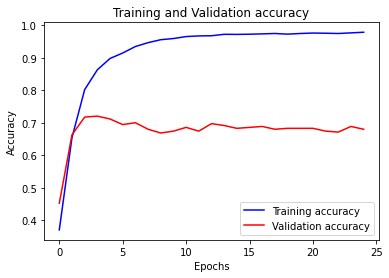

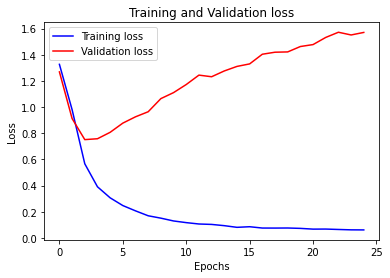

In [7]:
# Answer here
import matplotlib.pyplot as plt

training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

# acc plot
acc_train = training_log['accuracy']
acc_val = training_log['val_accuracy']
epochs = range(0,25)
plt.plot(epochs, acc_train, 'b', label='Training accuracy')
plt.plot(epochs, acc_val, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss plot
loss_train = training_log['loss']
loss_val = training_log['val_loss']
epochs = range(0,25)
plt.plot(epochs, loss_train, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# From the two plot below we can see that the model suffer from overfitting starting at about epoch 2 or 3. 
# starting from 2 or 3, the training accuracy keep going up. However, the validation result does not improve but start to decline.abs
# from this, we may conclude that the model start to overfit to the training data.abs
# we can see this effect even more clearly in the loss plot, where the validation loss started to increase while training loss is decreasing.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [8]:
# Answer here
# use these sequential word vectors as input of a RNN model, like the implementation of ELMO.
# we can then get the embedding of the whole sentence.
#Then, we can use this embedding as input of dense layer to do classification.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

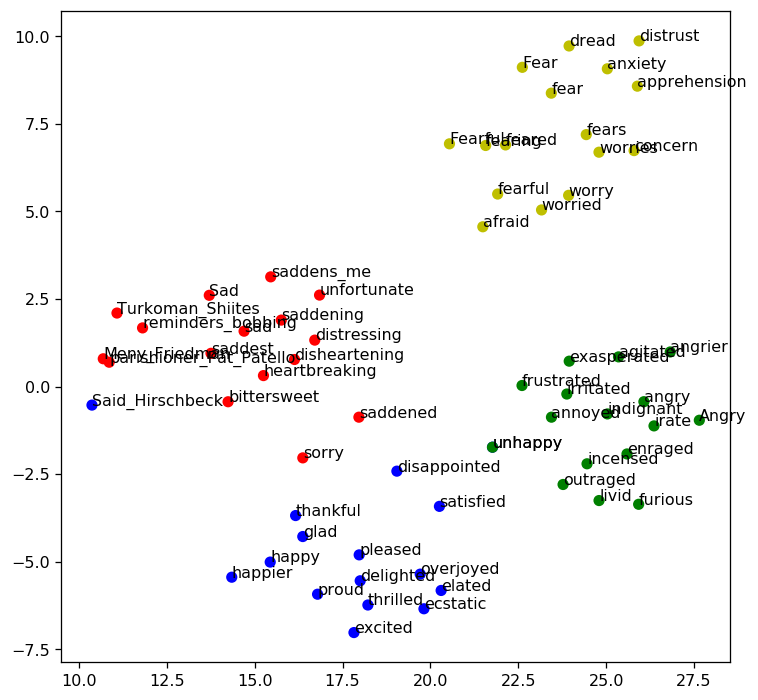

In [9]:
# Answer here
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

## w2v model
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
model = w2v_google_model

word_list = ['happy', 'angry', 'sad', 'fear']
topn = 15

happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

# print('happy_words: ', happy_words)
# print('angry_words: ', angry_words)
# print('sad_words: ', sad_words)
# print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words


# print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
# print(color)

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### Part 2: Kaggle Competition: code explanation and report
### data preprocessing

In [10]:
tweet_ids = []
texts = []
with open('dm2020-hw2-nthu/tweets_DM.json', 'r') as f: # open crawled data file
    i = 0
    for line in f.readlines():
        tmp = line.strip() # deal with space char
        # print(tmp)
        tmp = tmp.split('], "')[1]
        tmp = tmp.split(', "')[:2] # I only want id and text part use this pattern to cut them out
        
        tweet_id = tmp[0].split('": "')[1][:-1]
        # print(tweet_id)
        text = tmp[1].split('": "')[1][:-3].replace('<LH>', '') # I don't want "<LH>" appear in text since that it seems meaningless
        # print(text)
        tweet_ids.append(tweet_id)
        texts.append(text)

In [11]:
import pandas as pd
data = {'tweet_id': tweet_ids, 'text': texts}
df = pd.DataFrame(data, columns = ['tweet_id', 'text']) # build df which have 2 columns, id and text.

In [12]:
# split into training and testing dataframe
data_identification = pd.read_csv("dm2020-hw2-nthu/data_identification.csv") # read in the file which seperate training and testing data

df = pd.merge(df, data_identification, on='tweet_id') # merge with df based on tweet_id

# seperate training and testing data and drop the identification column
df_train = df.where(df['identification'] == 'train').dropna().drop(['identification'], axis=1)
df_test = df.where(df['identification'] == 'test').dropna().drop(['identification'], axis=1)
emotion = pd.read_csv("dm2020-hw2-nthu/emotion.csv") #read in label file
df_train = pd.merge(df_train, emotion, on='tweet_id') #merge label column with training data based in tweet_id
print(df_train)
print(df_test)

         tweet_id                                               text  \
0        0x376b20  People who post \"add me on #Snapchat\" must b...   
1        0x2d5350  @brianklaas As we see, Trump is dangerous to #...   
2        0x1cd5b0  Now ISSA is stalking Tasha \ud83d\ude02\ud83d\...   
3        0x1d755c  @RISKshow @TheKevinAllison Thx for the BEST TI...   
4        0x2c91a8           Still waiting on those supplies Liscus.    
...           ...                                                ...   
1455558  0x321566  I'm SO HAPPY!!! #NoWonder the name of this sho...   
1455559  0x38959e  In every circumtance I'd like to be thankful t...   
1455560  0x2cbca6  there's currently two girls walking around the...   
1455561  0x24faed  Ah, corporate life, where you can date  using ...   
1455562  0x34be8c                 Blessed to be living #Sundayvibes    

              emotion  
0        anticipation  
1             sadness  
2                fear  
3                 joy  
4        antici

### training
---
Firstly, I try BOW accompany with NB classifier. This trial gave me a 0.3 F1-score, which is pretty bad.
Therefore, I decided to use BERT as pretrained model in next trial.

In [13]:
BOW_500 = CountVectorizer(max_features=500) # build analyzers (bag-of-words)
BOW_500.fit(df_train['text']) # apply analyzer to training data
train_data_BOW_features_500 = BOW_500.transform(df_train['text'])
train_data_BOW_features_500.shape## check dimension

(1455563, 500)

In [14]:
from sklearn.naive_bayes import MultinomialNB

X_train = BOW_500.transform(df_train['text'])
y_train = df_train['emotion']
X_test = BOW_500.transform(df_test['text'])


NB_model = MultinomialNB() ## build NB model
NB_model = NB_model.fit(X_train, y_train) ## training!
y_test_pred = NB_model.predict(X_test) ## predict!

In [15]:
output = {'id': df_test['tweet_id'], 'emotion': y_test_pred}
output_df = pd.DataFrame(output, columns = ['id', 'emotion'])

In [16]:
output_df.to_csv(r'submission.csv', index=False)

---
### BERT
first BERT trial: use roberta and not adjusting any hyperparameter of the imported model. I get a 0.53xx F1-score on this one, which is pretty good. Therefore, I will start to tune some hyperparameter in next trial.

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

df_train.rename(columns={'emotion':'labels'}, inplace=True)

# Optional model configuration
model_args = ClassificationArgs()
model_args.labels_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]

# Create a ClassificationModel
model = ClassificationModel("roberta", "roberta-base", num_labels=8, args=model_args)

# Train the model
model.train_model(df_train)

# df_test
y_test_pred, _ = model.predict(df_test['text'].to_numpy())
# print(y_test_pred)
output = {'id': df_test['tweet_id'], 'emotion': y_test_pred}
output_df = pd.DataFrame(output, columns = ['id', 'emotion'])
output_df.to_csv(r'submission.csv', index=False)

---
Second BERT trial: use roberta and set learning rate to a larger value and use only half of the training instances. I get a 0.3xx F1-score on this one, which is pretty bad. This could due to two possible reasons. One is lack of training samples the other is that larger learning rate could result in unstable update of model weight while back propagating.

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
# df_train.rename(columns={'emotion':'labels'}, inplace=True)

# Optional model configuration
model_args = ClassificationArgs()
model_args.labels_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]
model_args.learning_rate = 1e-4
model_args.output_dir = "outputs_lr=1e4_frac=0.5/"

# Create a ClassificationModel
model = ClassificationModel("roberta", "roberta-base", num_labels=8, args=model_args)

# Train the model
model.train_model(df_train.sample(frac=0.5, replace=False, random_state=5))

# df_test
y_test_pred, _ = model.predict(df_test['text'].to_numpy())

output = {'id': df_test['tweet_id'], 'emotion': y_test_pred}
output_df = pd.DataFrame(output, columns = ['id', 'emotion'])
output_df.to_csv(r'submission.csv', index=False)

---
Third BERT trial: use roberta and set learning rate to a smaller value (1e-5). I get a 0.55xx F1-score on this one, which is an improvement of the first one. The reason could be that smaller learning rate let the model update more smoothly. Hence, get a better performance.

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
# df_train.rename(columns={'emotion':'labels'}, inplace=True)

# Optional model configuration
model_args = ClassificationArgs()
model_args.labels_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]
model_args.learning_rate = 1e-5
model_args.output_dir = "outputs_lr=1e5/"

# Create a ClassificationModel
model = ClassificationModel("roberta", "roberta-base", num_labels=8, args=model_args)

# Train the model
model.train_model(df_train)

# df_test
y_test_pred, _ = model.predict(df_test['text'].to_numpy())

output = {'id': df_test['tweet_id'], 'emotion': y_test_pred}
output_df = pd.DataFrame(output, columns = ['id', 'emotion'])
output_df.to_csv(r'submission.csv', index=False)

---
Forth BERT trial: use roberta and set learning rate to a even smaller value (5e-6). I get a  F1-score on this one,

In [26]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
df_train.rename(columns={'emotion':'labels'}, inplace=True)

# Optional model configuration
model_args = ClassificationArgs()
model_args.labels_list = ["anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise", "trust"]
model_args.learning_rate = 5e-6
model_args.output_dir = "outputs_lr=5e-6/"

# Create a ClassificationModel
model = ClassificationModel("roberta", "roberta-base", num_labels=8, args=model_args)

# Train the model
model.train_model(df_train)

# df_test
y_test_pred, _ = model.predict(df_test['text'].to_numpy())

output = {'id': df_test['tweet_id'], 'emotion': y_test_pred}
output_df = pd.DataFrame(output, columns = ['id', 'emotion'])
output_df.to_csv(r'submission.csv', index=False)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

/home/hwyang/anaconda3/lib/python3.7/site-packages/torch/optim/lr_scheduler.py:216: UserWarning:

Please also save or load the state of the optimizer when saving or loading the scheduler.

